In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("DAGs Data New.xlsx", index_col = [31, 41,1], parse_dates = True)
data.rename(columns={key: str(key).replace("_", " ").title() for key in data}, inplace= True)
data["General Outcome"][data["Environmental Outcome"]==1]=1
data["General Outcome"][data["Health Outcome"]==1]=1
keys = list(data.keys())
data.index.names

C:\Users\JLCat\AppData\Local\Temp\ipykernel_2664\3035151762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["General Outcome"][data["Environmental Outcome"]==1]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_2664\3035151762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["General Outcome"][data["Health Outcome"]==1]=1


FrozenList(['Loc_experiment', 'Year', 'Article_title'])

In [3]:
rename_vars = ["Public", "Private", "University"]

data.rename(columns = {col:col + " Funding" for col in rename_vars}, inplace = True)

In [4]:
years = keys[-31:]
countries = keys[-82:-31]
data.rename(columns = {year:str(year) for year in years}, inplace = True)
years = [str(year) for year in years]
data

Unnamed: 0  \
Loc_experiment Year       Article_title                                                    
ARGENTINA      2012-01-01 Glyphosate-based Herbicide - a Genotoxic but no...          60   
               2007-01-01 Microbial Respiration in Soils of the Argentine...         130   
               2016-01-01 Survival, Reproduction, Avoidance Behavior and ...         162   
               2020-01-01 Glyphosate and AMPA concentrations in the respi...         183   
               2018-01-01 Determination of glyphosate, AMPA and glufosina...         208   
...                                                                                  ...   
USA            2005-01-01 Sublethal Effects of the Herbicide Glyphosate o...         445   
               2020-01-01 Assessment of lethal and sublethal effects of i...         471   
               2019-01-01 Developmental and epigenetic effects of Roundup...         487   
               2018-01-01 Glyphosate perturbs the gut microbiota of honey...         491   
               2019-01-01 Assessment of Glyphosate Induced Epigenetic Tra...         492   

                                                                                                                   Article Link  \
Loc_experiment Year       Article_title                                                                                           
ARGENTINA      2012-01-01 Glyphosate-based Herbicide - a Genotoxic but no...  https://www.ejso.com/article/S0748-7983(12)006...   
               2007-01-01 Microbial Respiration in Soils of the Argentine...        http://dx.doi.org/10.1080/00103620701826506   
               2016-01-01 Survival, Reproduction, Avoidance Behavior and ...  https://link.springer.com/article/10.1007%2Fs0...   
               2020-01-01 Glyphosate and AMPA concentrations in the respi...     https://doi.org/10.1016/j.geoderma.2020.114334   
               2018-01-01 Determination of glyphosate, AMPA and glufosina...    https://doi.org/10.1016/j.scitotenv.2018.06.340   
...                                                                                                                         ...   
USA            2005-01-01 Sublethal Effects of the Herbicide Glyphosate o...                      DOI:10.1007/s00128-005-0771-3   
               2020-01-01 Assessment of lethal and sublethal effects of i...       https://doi.org/10.1016/j.ecoenv.2020.111108   
               2019-01-01 Developmental and epigenetic effects of Roundup...      https://doi.org/10.1016/j.aquatox.2019.03.005   
               2018-01-01 Glyphosate perturbs the gut microbiota of honey...            https://doi.org/10.1073/pnas.1803880115   
               2019-01-01 Assessment of Glyphosate Induced Epigenetic Tra...  https://www.nature.com/articles/s41598-019-428...   

                                                                              General Outcome  \
Loc_experiment Year       Article_title                                                         
ARGENTINA      2012-01-01 Glyphosate-based Herbicide - a Genotoxic but no...                0   
               2007-01-01 Microbial Respiration in Soils of the Argentine...                0   
               2016-01-01 Survival, Reproduction, Avoidance Behavior and ...                0   
               2020-01-01 Glyphosate and AMPA concentrations in the respi...                1   
               2018-01-01 Determination of glyphosate, AMPA and glufosina...                0   
...                                                                                       ...   
USA            2005-01-01 Sublethal Effects of the Herbicide Glyphosate o...                1   
               2020-01-01 Assessment of lethal and sublethal effects of i...                1   
               2019-01-01 Developmental and epigenetic effects of Roundup...                1   
               2018-01-01 Glyphosate perturbs the gut microbiota of honey...                1   
             

In [5]:
years = [year for year in years if year != "2021"]
full_data_countries = {year:[""] for year in years}
for year in years:
    
    mean_data = data.groupby(["Year", "Loc_experiment"]).mean().loc[:"2020"]
    
    year_data = mean_data.loc[year:]
# #     print(year_data)
    year_subset = [y for y in years if y >= year ]

    for country in countries:
        country = country.upper()
        try:
            if len(year_subset) == len(year_data[year_data.index.get_level_values("Loc_experiment")==country]["General Outcome"]):
                full_data_countries[year][0] = full_data_countries[year][0] + country + ", "
        except:
            continue

pd.DataFrame(full_data_countries).T.loc["2003":]#.to_csv("FullDataContriesByYear.csv")
#     for country in countries:
#         try:
#             print(mean_data.loc[year_subset, country])
#         except:
#             continue
#     for country in countries:
        
#     print(len(list(set(mean_data.loc[str(year):].dropna(axis = 1).index.get_level_values("Loc_experiment")))))

,0
2003,"BRAZIL,"
2004,"BRAZIL,"
2005,"BRAZIL,"
2006,"BRAZIL,"
2007,"BRAZIL, USA, ARGENTINA,"
2008,"BRAZIL, USA, ARGENTINA,"
2009,"BRAZIL, USA, ARGENTINA,"
2010,"BRAZIL, USA, ARGENTINA,"
2011,"BRAZIL, USA, ARGENTINA,"
2012,"BRAZIL, USA, ARGENTINA,"


In [6]:
year_data

Unnamed: 0  General Outcome  General Outcome (1,0)  \
Year       Loc_experiment                                                       
2020-01-01 ARGENTINA       296.076923         1.000000               1.000000   
           AUSTRALIA       447.000000         0.500000               0.500000   
           BELGIUM         381.000000         1.000000               1.000000   
           BRAZIL          230.888889         0.666667               0.666667   
           CANADA          180.000000         1.000000               1.000000   
           CHINA           320.500000         1.000000               1.000000   
           GERMANY         325.400000         0.600000               0.600000   
           INDIA           346.000000         0.500000               0.500000   
           IRAN            502.000000         1.000000               1.000000   
           ITALY           262.500000         0.750000               0.750000   
           JAPAN           412.000000         1.000000               1.000000   
           MEXICO          423.000000         0.000000               0.000000   
           NIGERIA         161.000000         1.000000               1.000000   
           POLAND          269.000000         0.750000               0.750000   
           PORTUGAL        298.000000         0.500000               0.500000   
           SERBIA          186.000000         0.000000               0.000000   
           SLOVENIA        259.000000         0.000000               0.000000   
           SPAIN           477.000000         1.000000               1.000000   
           SWITZERLAND     182.000000         0.000000               0.000000   
           TUNISIA         181.000000         1.000000               1.000000   
           TURKEY          173.000000         1.000000               1.000000   
           UK              211.000000         0.000000               0.000000   
           USA             293.250000         0.625000               0.500000   

                           Daily Intake  Health Outcome  \
Year       Loc_experiment                                 
2020-01-01 ARGENTINA                0.0        0.307692   
           AUSTRALIA                0.0        0.000000   
           BELGIUM                  0.0        0.000000   
           BRAZIL                   0.0        0.444444   
           CANADA                   0.0        1.000000   
           CHINA                    0.0        0.000000   
           GERMANY                  0.0        0.400000   
           INDIA                    0.0        0.000000   
           IRAN                     0.0        0.000000   
           ITALY                    0.0        0.250000   
           JAPAN                    0.0        1.000000   
           MEXICO                   0.0        0.000000   
           NIGERIA                  0.0        1.000000   
           POLAND                   0.0        0.500000   
           PORTUGAL                 0.0        0.000000   
           SERBIA                   0.0        0.000000   
           SLOVENIA                 0.0        0.000000   
           SPAIN                    0.0        1.000000   
           SWITZERLAND              0.0        0.000000   
           TUNISIA                  0.0        1.000000   
           TURKEY                   0.0        1.000000   
           UK                       0.0        0.000000   
           USA                      0.0        0.250000   

                           Environmental Outcome  University Funding  \
Year       Loc_experiment                                              
2020-01-01 ARGENTINA                    0.615385            0.692308   
           AUSTRALIA                    0.500000            0.000000   
           BELGIUM                      1.000000            0.000000   
           BRAZIL                       0.222222            0.222222   
           CANADA                       0.000000            0.000000   
           CHINA     

C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

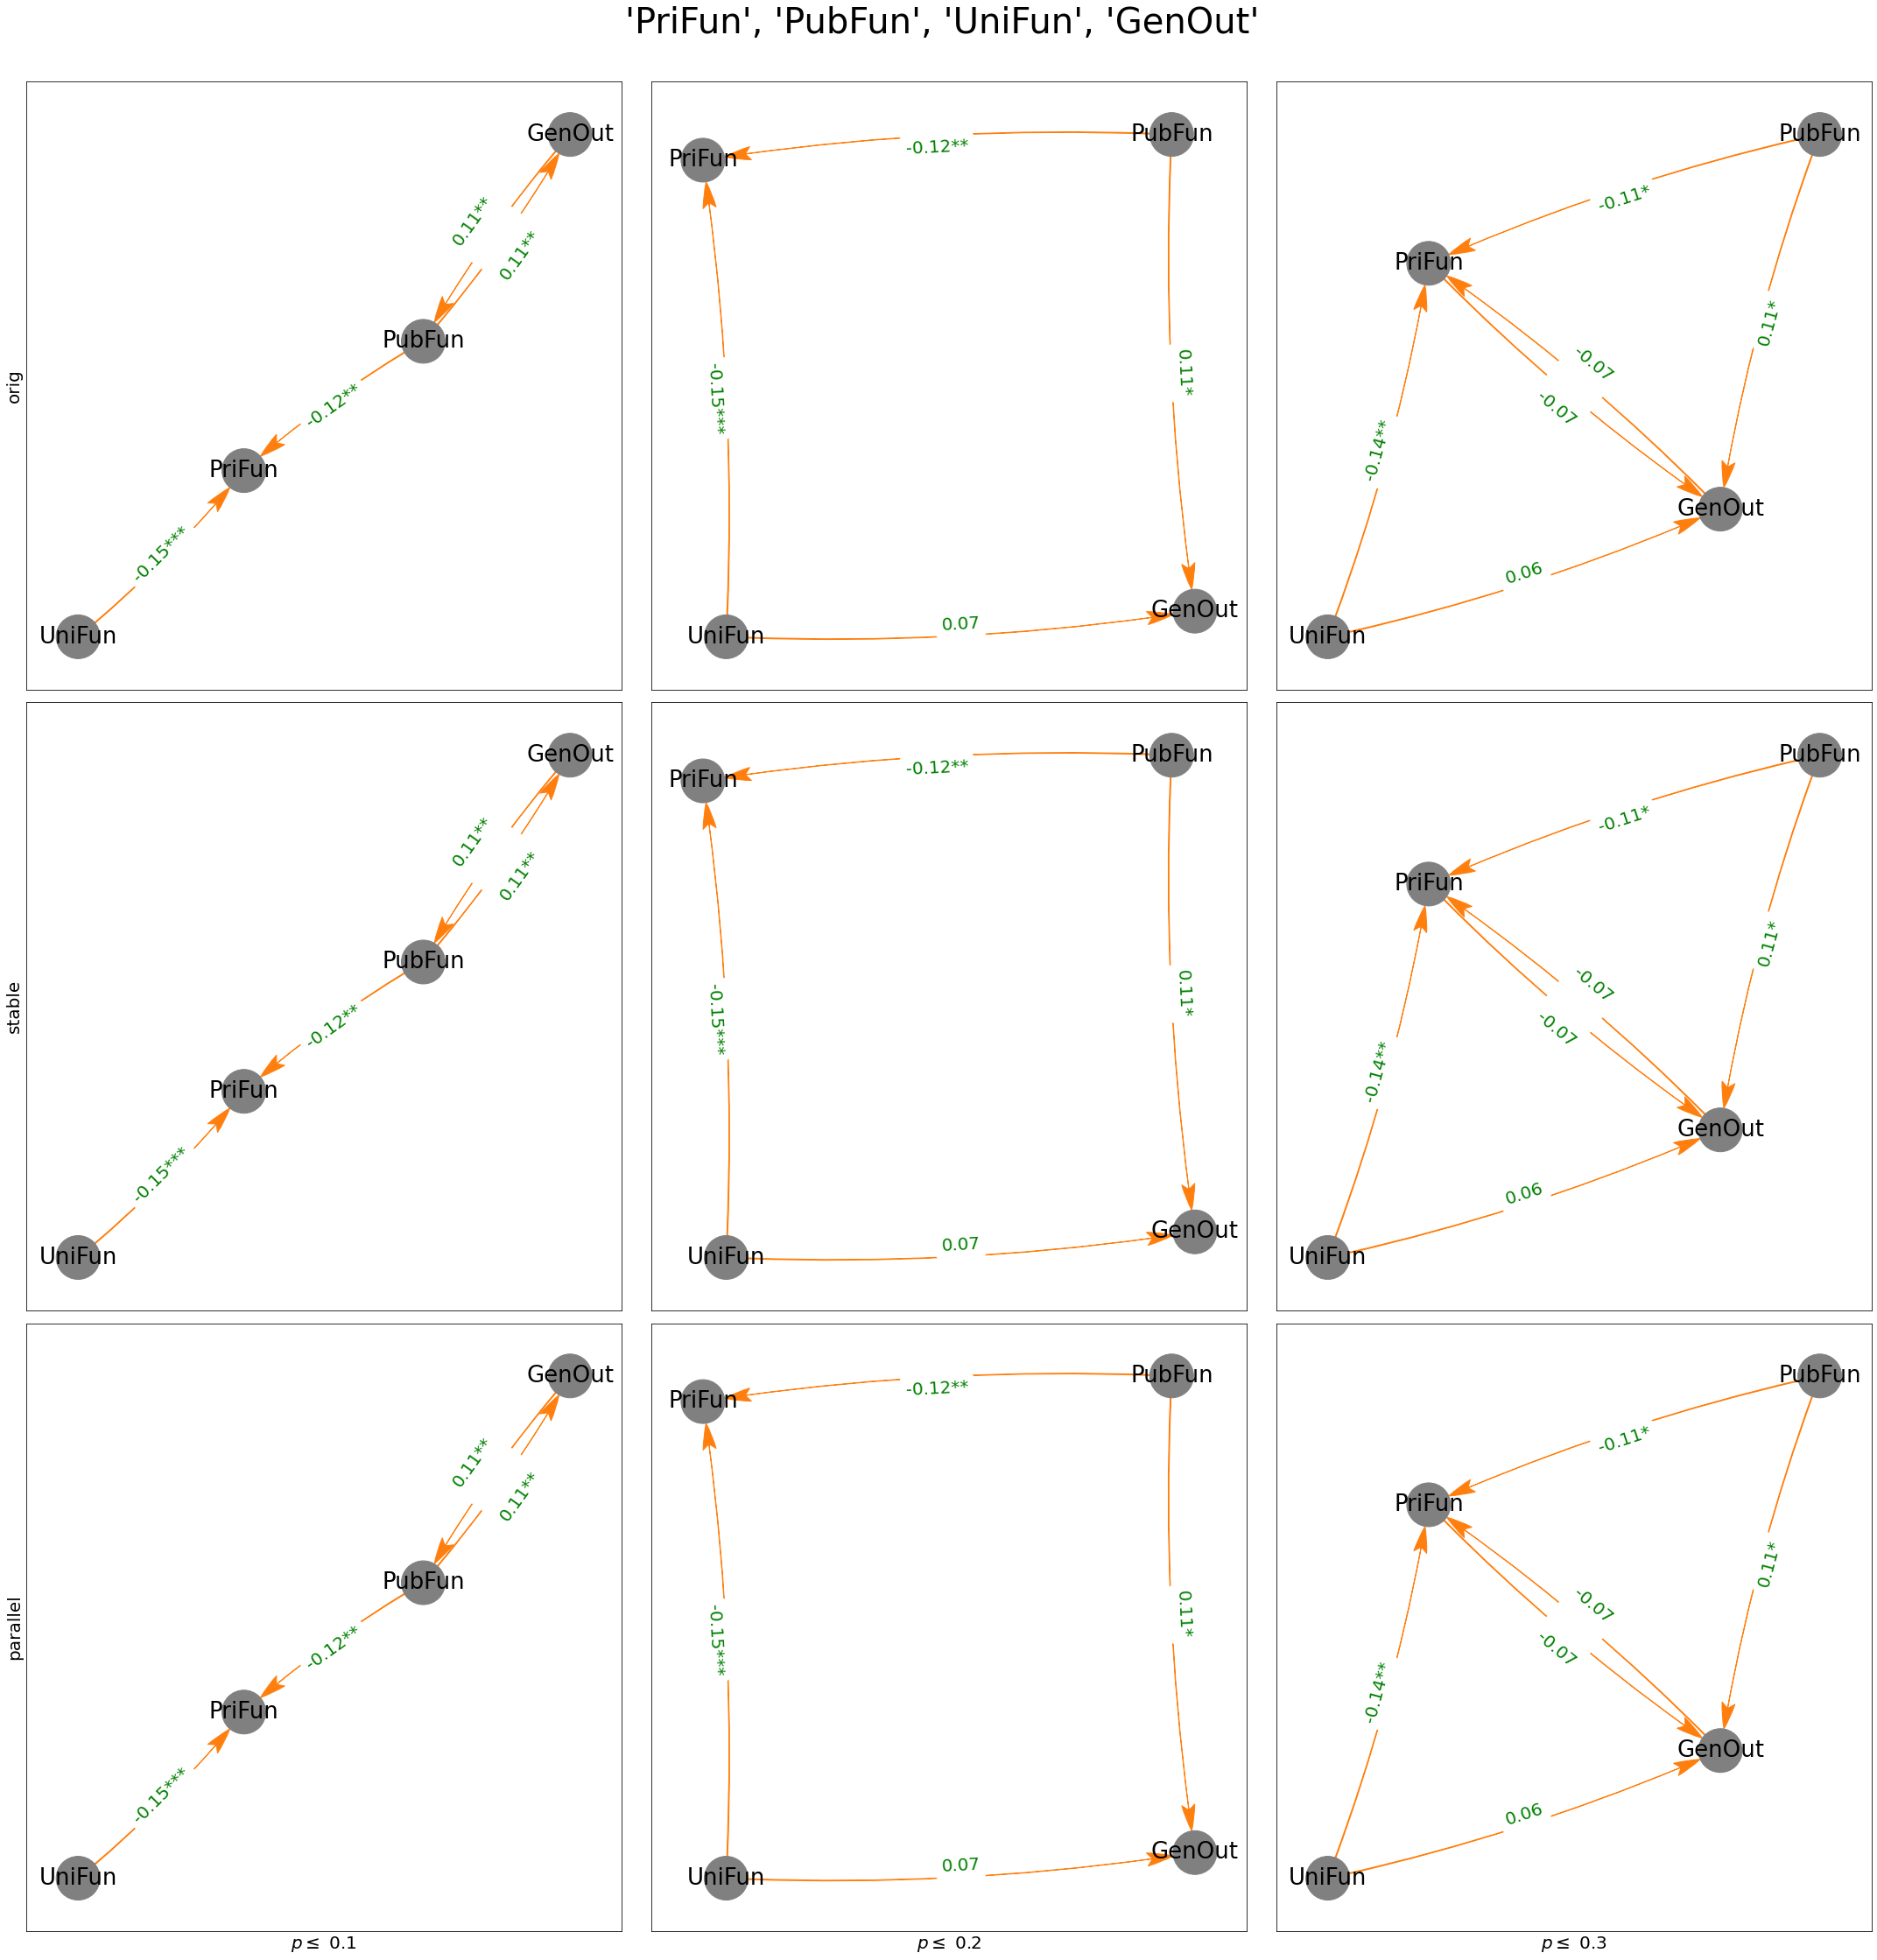

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

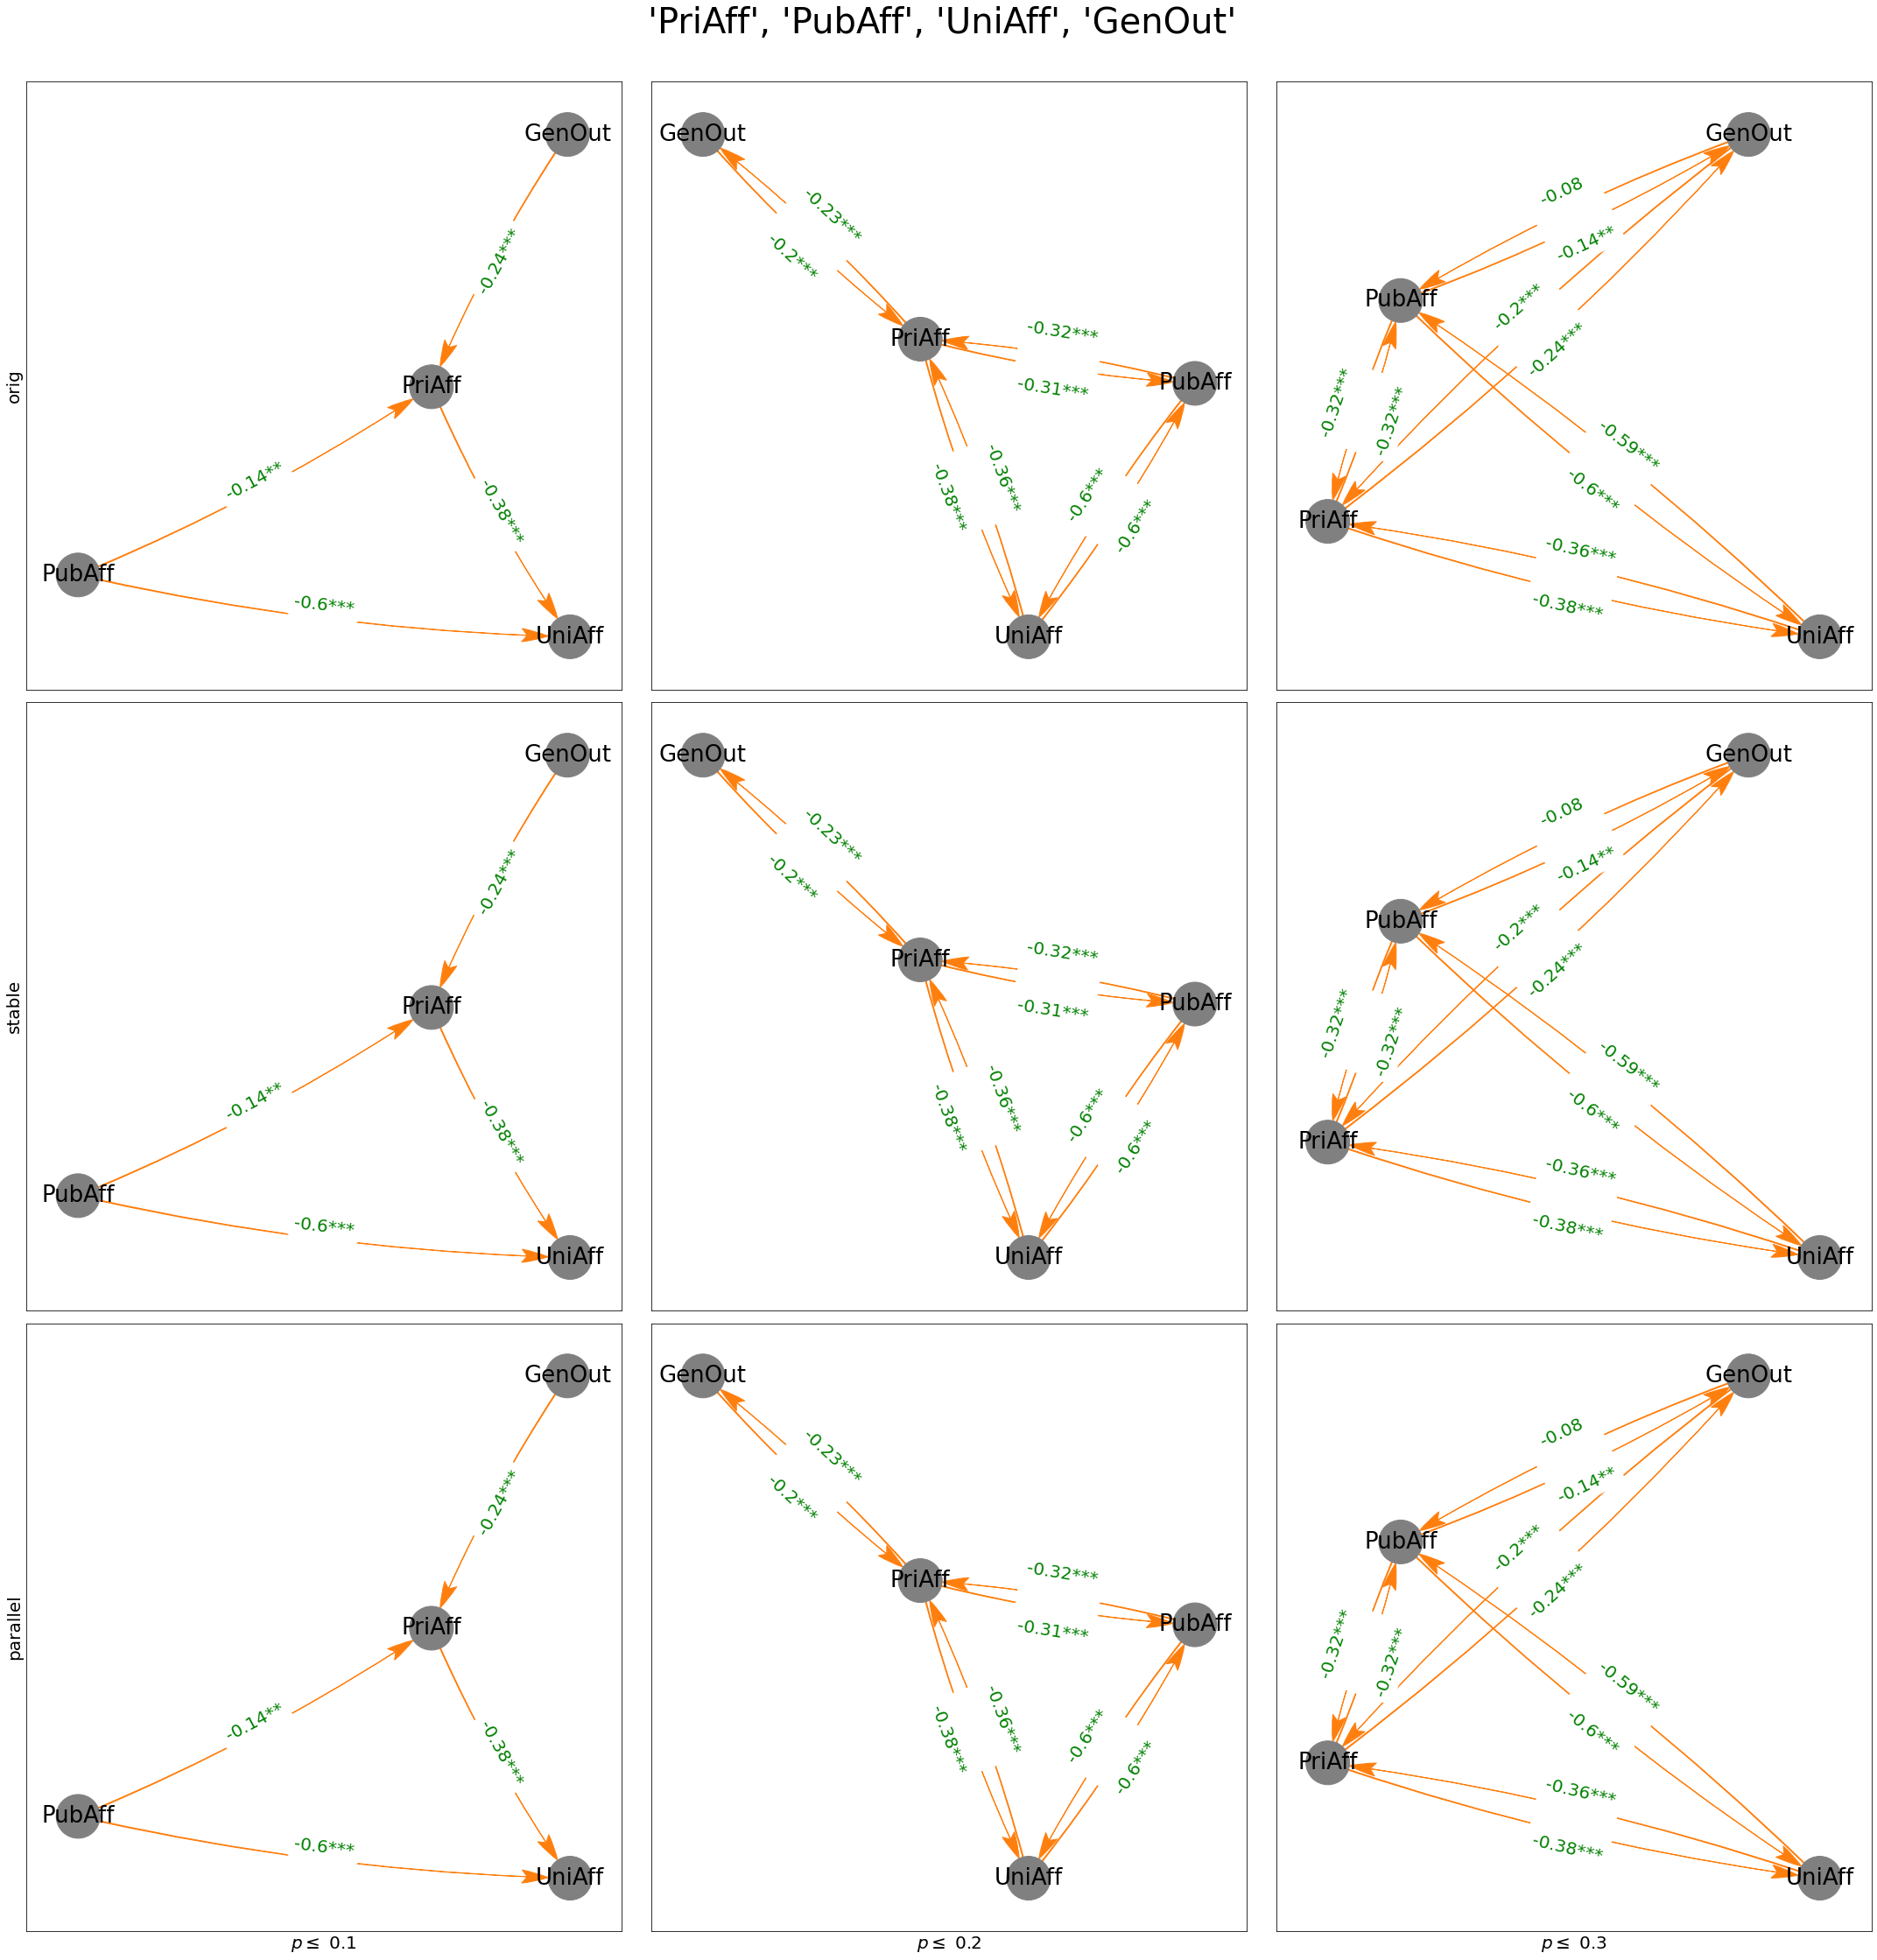

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

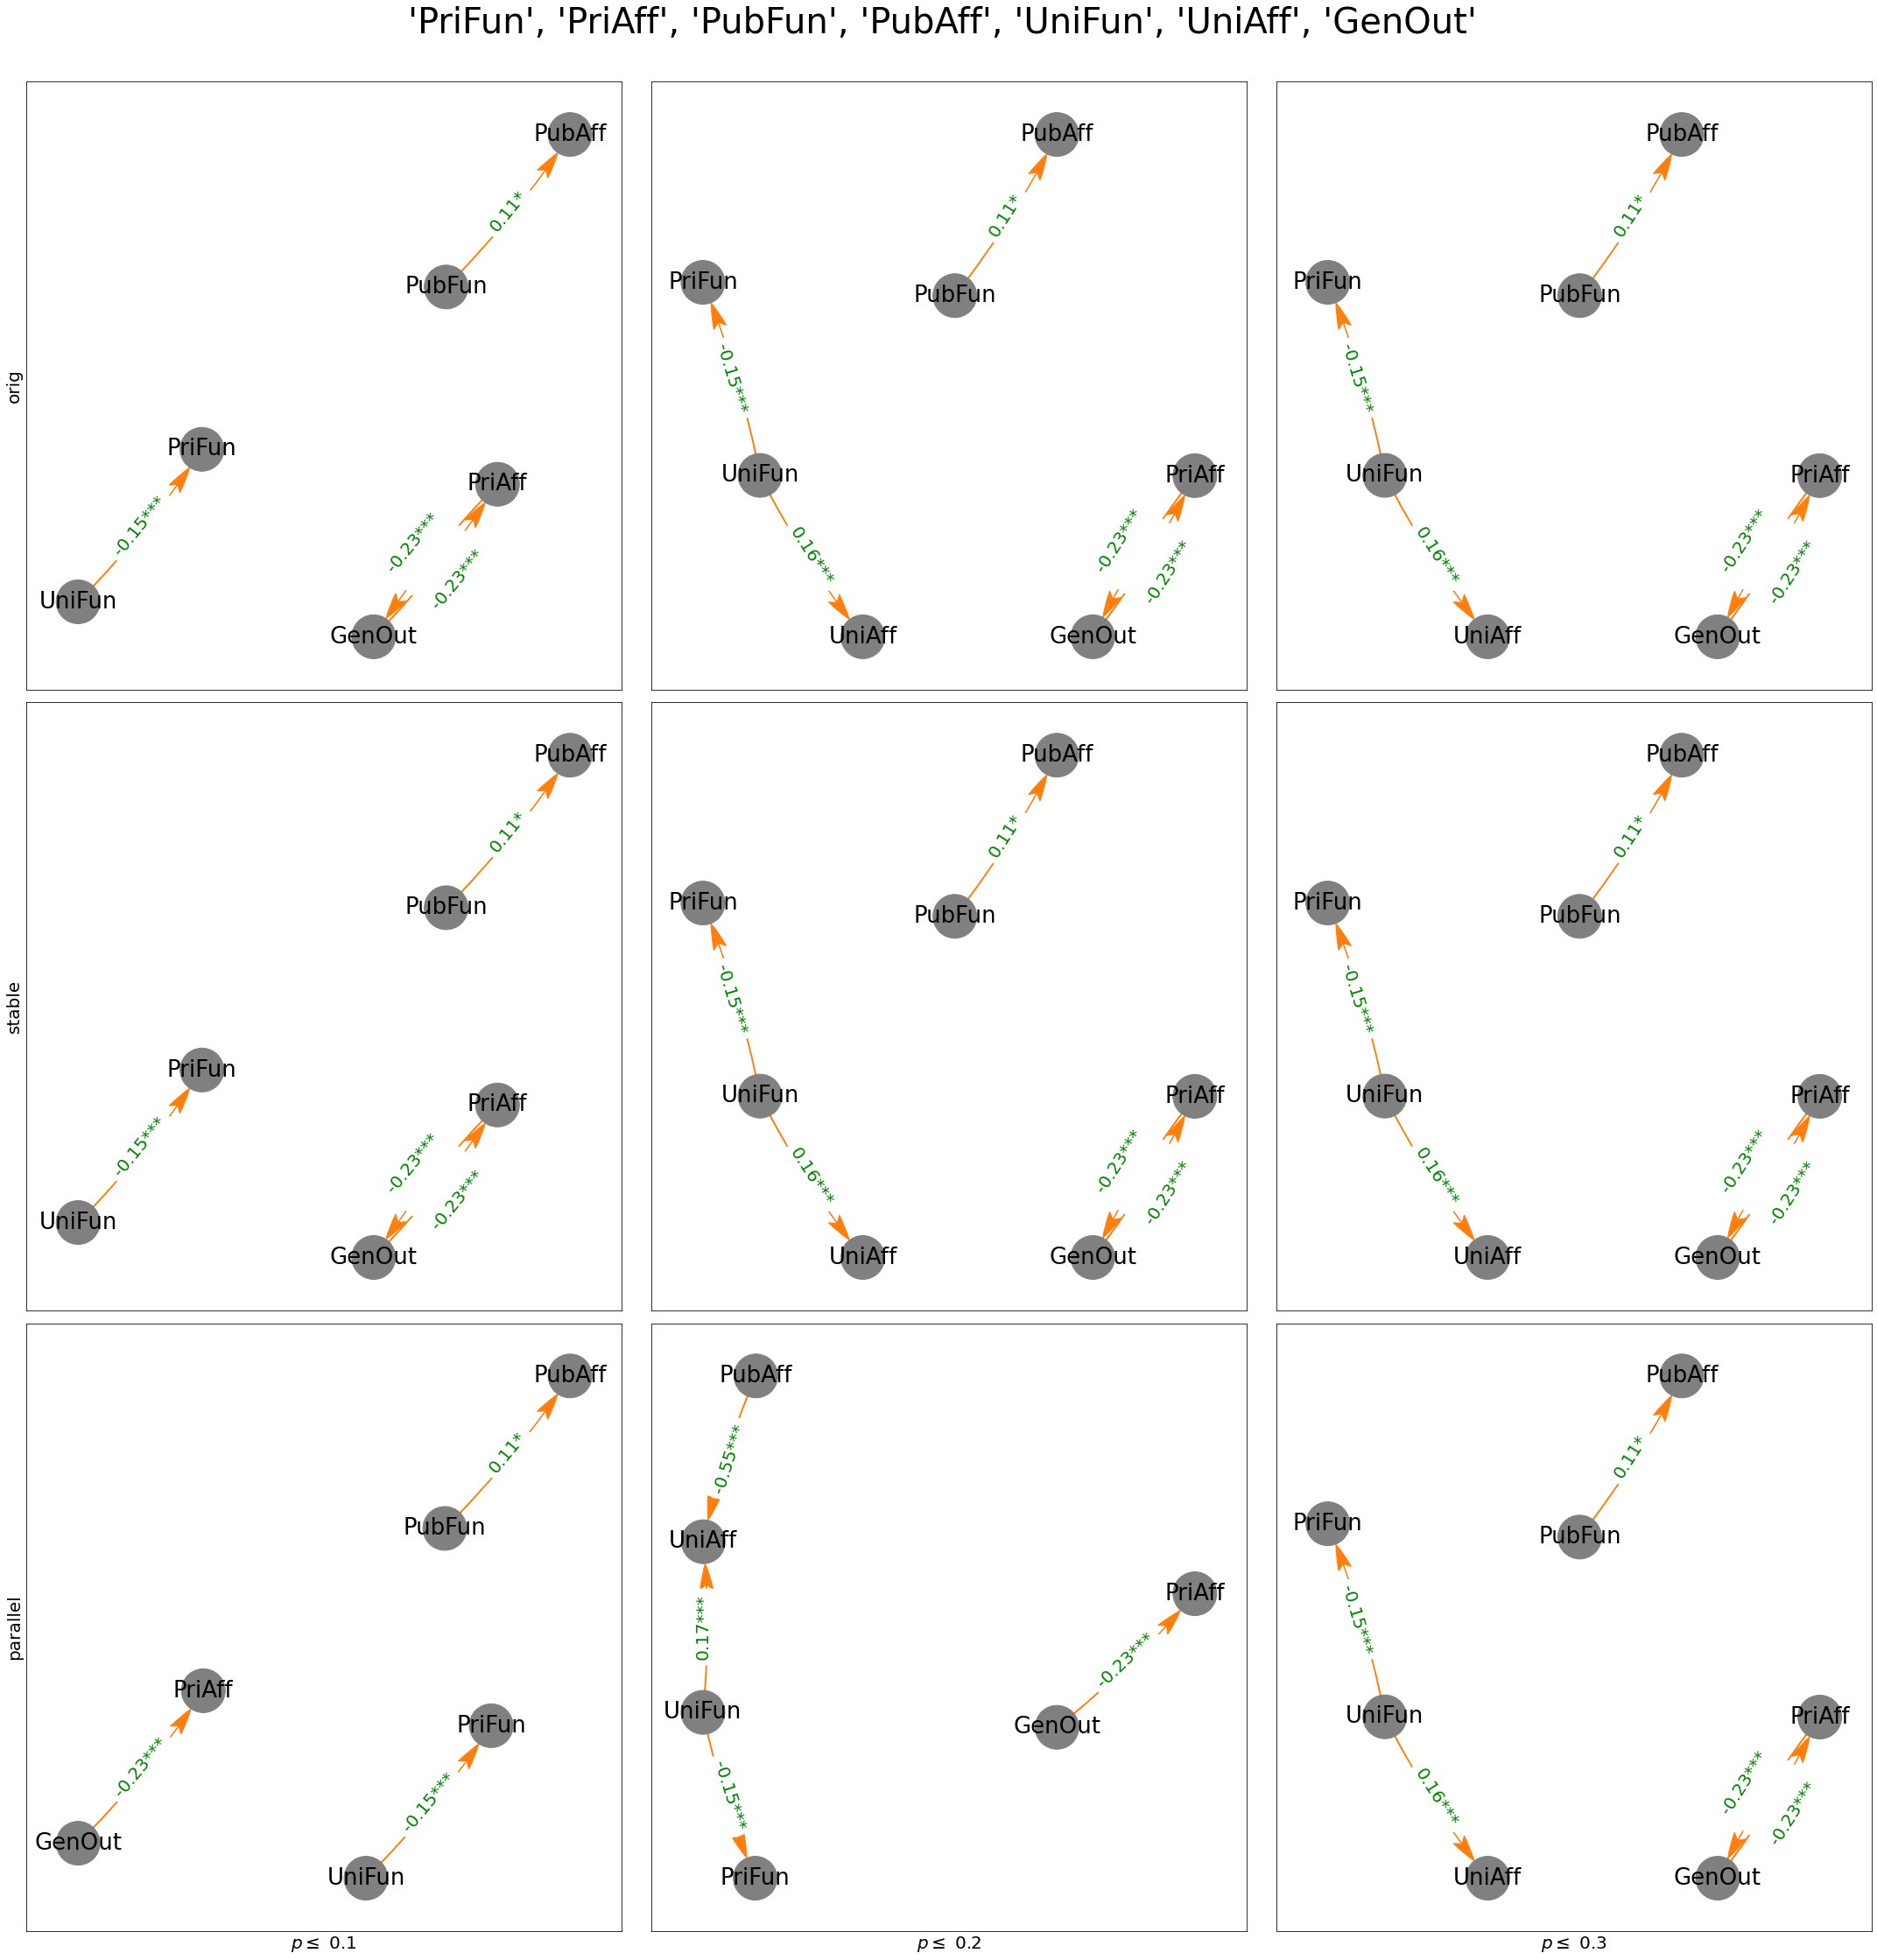

OutEdgeView([('UniFun', 'PriFun'), ('UniFun', 'UniAff'), ('PubFun', 'PubAff'), ('GenOut', 'PriAff'), ('PriAff', 'GenOut')])

In [7]:
import pingouin
from pgmpy.estimators import PC
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
from networkx.drawing.nx_agraph import graphviz_layout
import warnings
warnings.filterwarnings("ignore")
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx


def firstLetterWord(str, num_chars = 3):
 
    result = ""
 
    # Traverse the string.
    v = True
    for i in range(len(str)):
         
        # If it is space, set v as true.
        if (str[i] == ' '):
            v = True
 
        # Else check if v is true or not.
        # If true, copy character in output
        # string and set v as false.
        elif (str[i] != ' ' and v == True):
            result += (str[i:i+num_chars])
            v = False
 
    return result

def graph_DAG(edges, data_reg, title = "", 
              fig = False, ax = False, 
              edge_labels = False,sig_vals = [0.05, 0.01, 0.001]):
    pcorr = data_reg.pcorr()
    graph = nx.DiGraph()
    def build_edge_labels(edges, df, sig_vals):
        edge_labels = {}
        for edge in edges:
            controls = [key for key in df.keys() if key not in edge]
            controls = list(set(controls))
            keep_controls = []
            for control in controls:
                control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
                if (control, edge[1]) in control_edges:
                    keep_controls.append(control)                
#             print(edge, keep_controls)
            pcorr = df.partial_corr(x = edge[0], y = edge[1], covar=keep_controls,
                                  method = "pearson")
            label = str(round(pcorr["r"][0],2))
            pvalue = pcorr["p-val"][0]
#             pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#             label = pcorr[edge[0]].loc[edge[1]]

            for sig_val in sig_vals:
                if pvalue < sig_val: 
                    label = label + "*"   
            
            edge_labels[edge] = label
        return edge_labels
    
    if edge_labels == False:
        edge_labels = build_edge_labels(edges, 
                                        data_reg, 
                                        sig_vals=sig_vals) 
    graph.add_edges_from(edges)
    color_map = ["grey" for g in graph]

    if fig == False and ax == False: fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = graphviz_layout(graph)

    edge_labels2 = []
    for u, v, d in graph.edges(data=True):
        if pos[u][0] > pos[v][0]:  
            if (v,u) in edge_labels.keys():
                edge_labels2.append(((u, v,), f'{edge_labels[u,v]}\n\n\n{edge_labels[(v,u)]}'))  
        if (v,u) not in edge_labels.keys():
            edge_labels2.append(((u,v,), f'{edge_labels[(u,v)]}'))
    edge_labels = dict(edge_labels2)

    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 2500,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     connectionstyle='arc3, rad = 0.05',
                     ax = a)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20,
                                ax = a)
    
    
pp = PdfPages("DAGOutputs.pdf")
DAG_models_vars = {3:["Private Funding", "Public Funding", "University Funding", "General Outcome"],
                  4:["Private Affiliation", "Public Affiliation", "University Affiliation", "General Outcome"],
                  5:["Private Funding","Private Affiliation", "Public Funding","Public Affiliation", 
                     "University Funding", "University Affiliation", "General Outcome"],}
# link_sigs = [0.05, 0.1, 0.2]
link_sigs = [0.1, .2, .3]
algorithms = ["orig", "stable", "parallel"]
for keys in DAG_models_vars.values():
    fig, ax = plt.subplots(len(algorithms), len(link_sigs), figsize = (30,30))
    max_cond_vars = len(keys) - 2
    data_reg = data[keys].dropna()
    data_reg.rename(columns = {col:firstLetterWord(col) for col in keys}, inplace = True)
    keys = data_reg.keys()
    c = PC(data_reg[keys].dropna())
    max_cond_vars = len(keys) - 2
    i,j = 0,0
    for sig in link_sigs:
        for algorithm in algorithms:
            model = c.estimate(return_type = "pdag", variant = algorithm, 
                               significance_level = sig, 
                               max_cond_vars = max_cond_vars, ci_test = "chi_square")
            edges = model.edges()
            pcorr = data_reg.pcorr()
            weights = {}
            a = ax[i][j]
            graph_DAG(edges, data_reg, fig = fig, ax = a)
        
            if j == 0:
                a.set_ylabel(algorithm, fontsize = 20)
            if i == len(algorithms) - 1:
                a.set_xlabel("$p \leq$ "+ str(sig), fontsize = 20)
            i += 1
        j += 1
        i = 0
    plt.suptitle(str(list(keys)).replace("[","").replace("]",""), fontsize = 40, y =1.035)
    plt.show()
    pp.savefig(fig, bbox_inches = "tight")
    plt.close()
pp.close()
edges